In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import sympy  as sp
import numpy  as np
import mpmath as mp
import numpy  as np
import matplotlib.pyplot as plt

from scipy.stats import wasserstein_distance
from scipy.signal import find_peaks

In [83]:
df = pd.read_csv('files/DataBase.csv')
df

,wy,ay,yaw,wx,time,az,wz,pitch,ax,roll
0,0.0,0.0,0.0,0.0,0.261000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.271000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.281000,0.0,0.0,0.0,0.0,0.0
3,-1.0,135.0,0.0,0.0,0.741000,-6.0,0.0,0.0,-479.0,0.0
4,-1.0,135.0,0.0,0.0,0.741000,-6.0,0.0,0.0,-479.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10359,10.0,78.0,33886.0,-2.0,114.060997,-294.0,4.0,902.0,-394.0,12696.0
10360,9.0,78.0,33886.0,0.0,114.070999,-294.0,3.0,902.0,-394.0,12696.0
10361,9.0,78.0,33886.0,-1.0,114.081001,-294.0,4.0,902.0,-394.0,12697.0
10362,13.0,78.0,33888.0,1.0,114.161003,-295.0,5.0,905.0,-394.0,12706.0


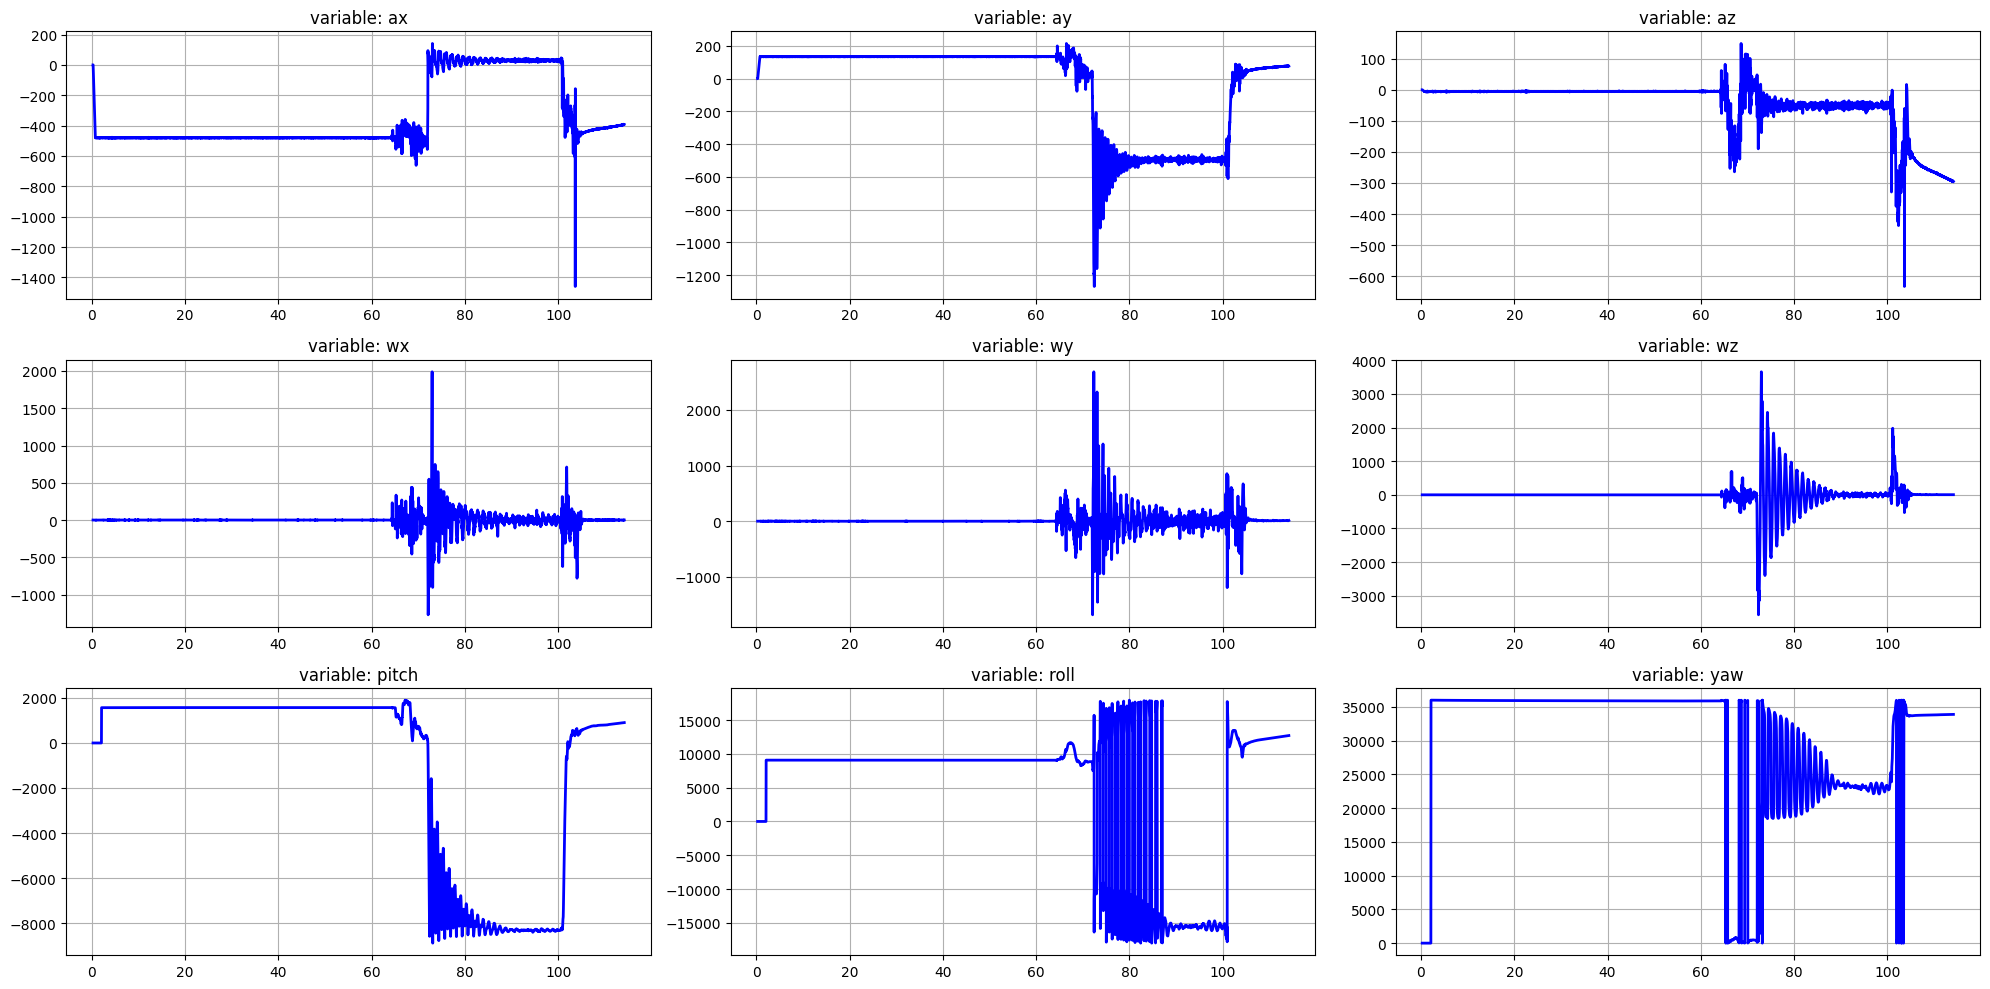

In [84]:
def plotAll(df, limits=None):
    limits = list(limits) if limits is not None else [None, None]

    if limits[0] is None:
        limits[0] = 0

    if limits[1] is None:
        limits[1] = df.time.values[-1]

    target = df.loc[(df.time >= limits[0]) & (df.time <= limits[1])]

    plt.figure(figsize=(20, 10))
    for i, key in enumerate(['ax', 'ay', 'az', 'wx', 'wy', 'wz', 'pitch', 'roll', 'yaw']):
        plt.subplot(3, 3, i+1)
        plt.plot(target.time, target[key], color='blue', linewidth=2)
        plt.title(f'variable: {key}'), plt.grid()

    plt.tight_layout()
    plt.show()


plotAll(df, limits=None)

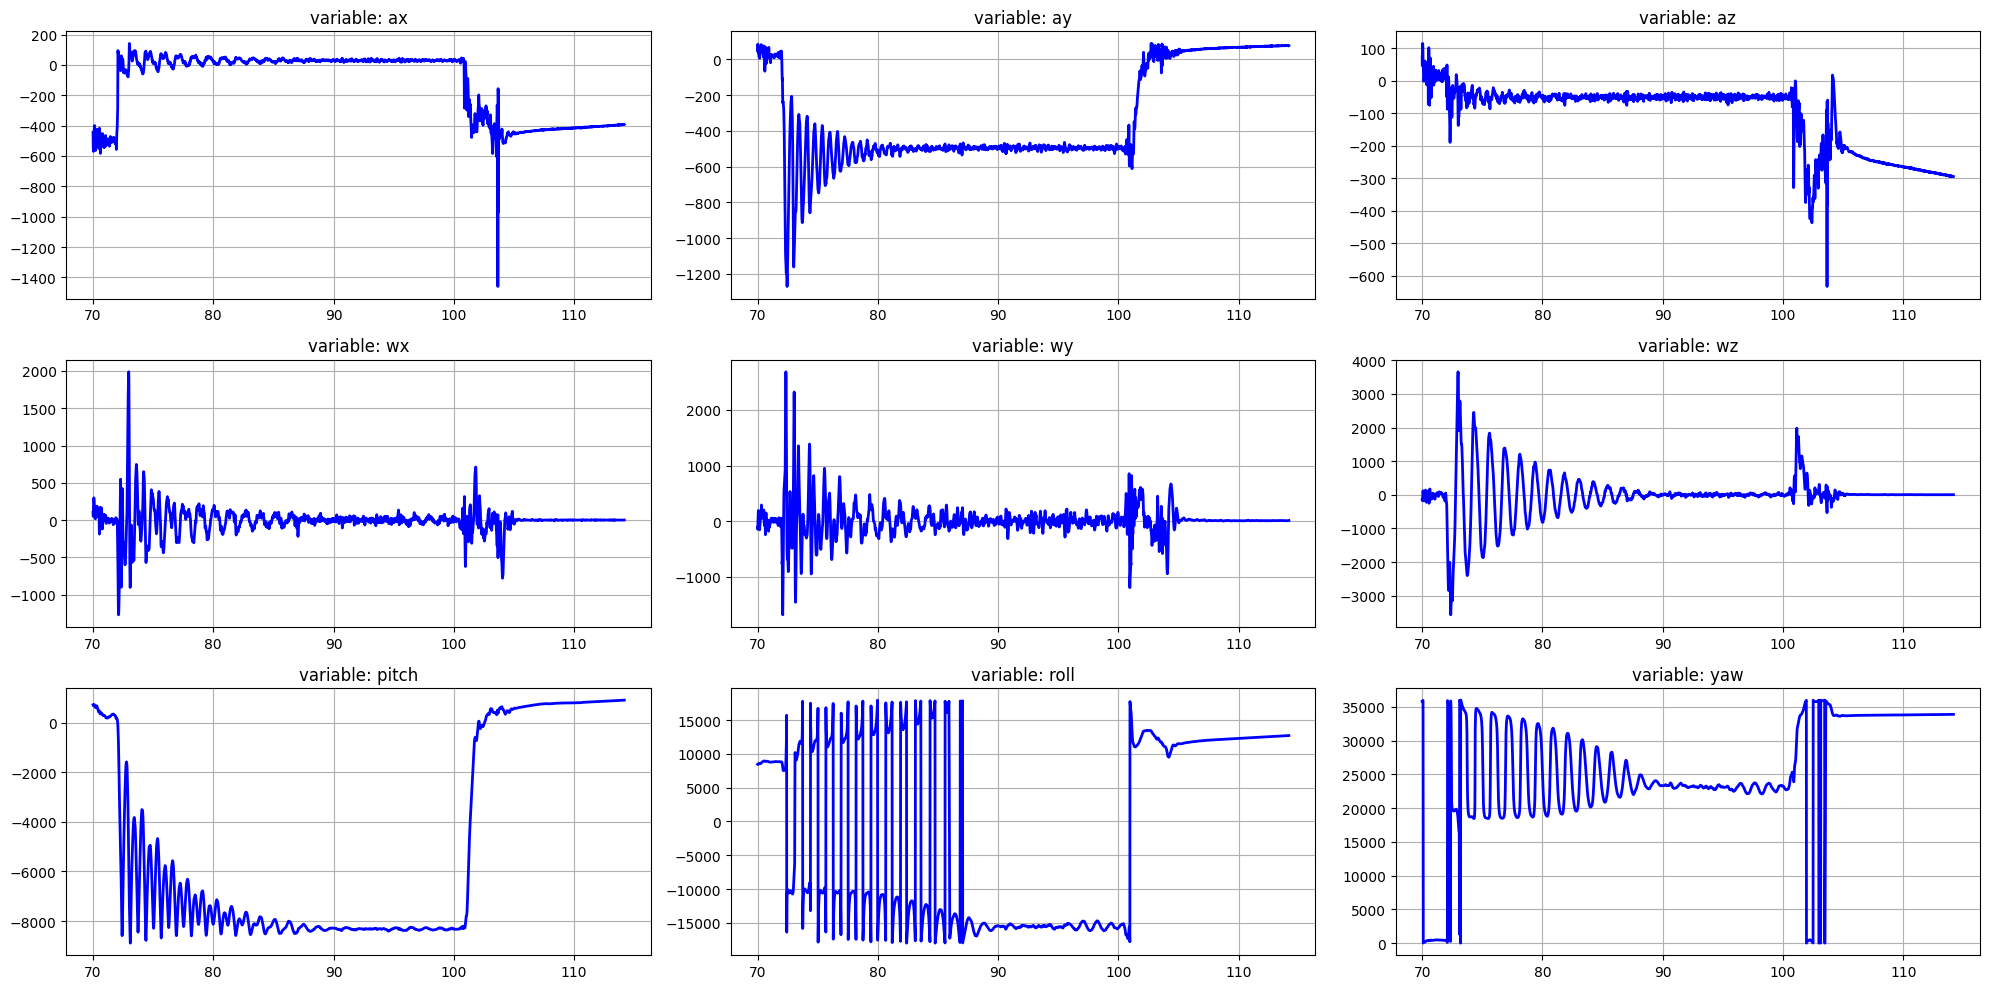

In [85]:
plotAll(df, limits=(70, None))

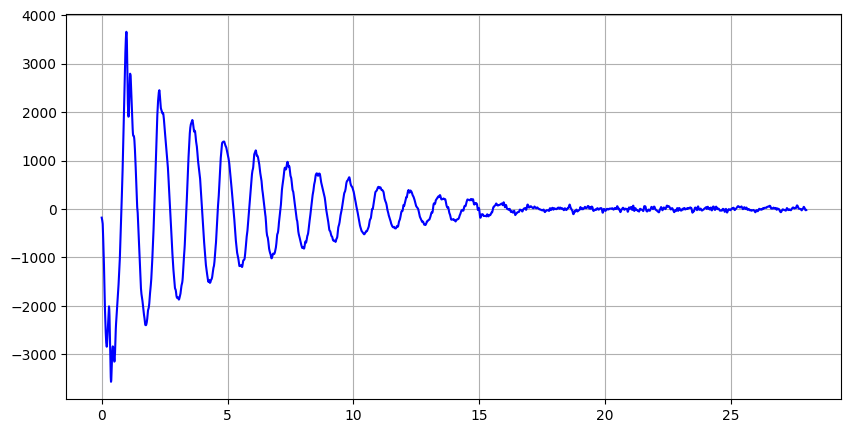

In [86]:
target = df.loc[(df.time > 72) & (df.time < 100)].copy()
target['time'] = target.time.values - target.time.values[0]

plt.figure(figsize=(10, 5))
plt.plot(target.time, target.wz, color='blue')
plt.grid()

In [87]:
A, B, C = sp.symbols('A B C', real=True)
t = sp.symbols('t')

w = A*sp.cos(B*t)*sp.exp(-C*t) 
w

A*exp(-C*t)*cos(B*t)

- $w(0) = A$
- $w(\infty) = 0$

In [88]:
from scipy.optimize import curve_fit, OptimizeWarning
import warnings


def function(t, A, B, C):
    return A*np.cos(B*t)*np.exp(-C*t) 

def curveFit(xData, yData, maxIter=2100000000):
    coefs = curve_fit(function, xData, yData, maxfev=maxIter)
    return [round(coef, 12) for coef in list(coefs[0])]

def getFitPrecision(xData, yData, coefs):
    residuals = yData - function(xData, *coefs)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((yData - np.mean(yData))**2)
    prec = 1 - (ss_res / ss_tot)
    return 0 if prec < 0 else prec
    

coefs = curveFit(target.time, target.wz)
coefs

[np.float64(-2742.515055771805),
 np.float64(-2.713015518389),
 np.float64(0.903784368515)]

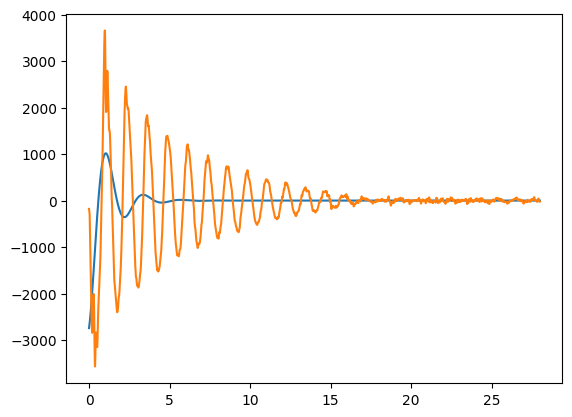

In [89]:
plt.plot(target.time, function(target.time, *coefs))
plt.plot(target.time, target.wz)